In [3]:
import librosa as lb
import numpy
import scipy.io.wavfile
from scipy.fftpack import dct
import matplotlib.pyplot as plt

In [11]:
sample_rate, signal = scipy.io.wavfile.read('dev_data/bearing/test/section_00_source_test_anomaly_0000_vel_6.wav')  # File assumed to be in the same dir

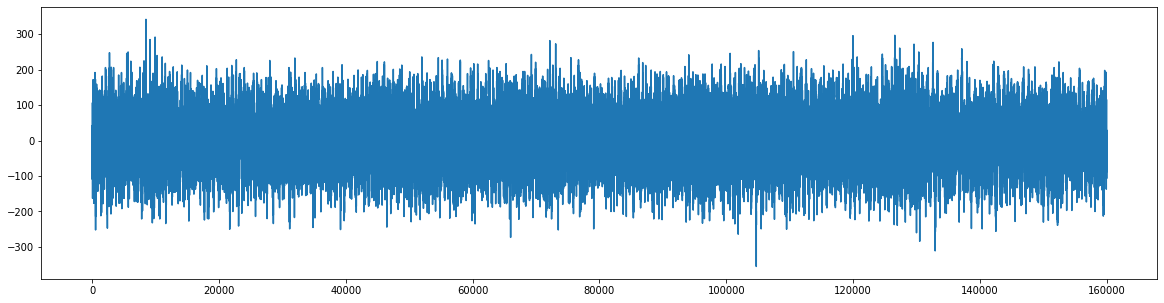

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(signal)

# framing

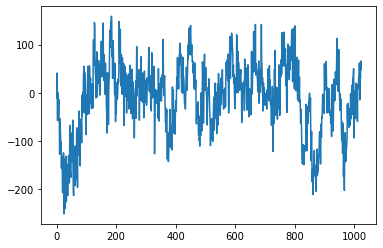

In [19]:
frame_size =1024
frame_stride = 512

frame_length, frame_step = frame_size, frame_stride # Convert from seconds to samples
signal_length = len(signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = numpy.zeros((pad_signal_length - signal_length))
pad_signal = numpy.append(signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(numpy.int32, copy=False)]
plt.plot(frames[1])

# Windowing

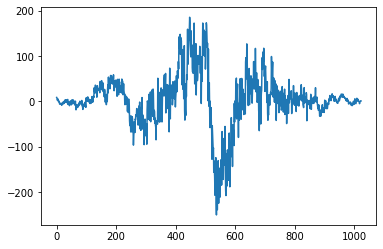

In [20]:
frames *= numpy.hamming(frame_length)
plt.plot(frames[0])